In [16]:
# Import the required libraries
import pandas as pd
import numpy as np
import joblib
import sys
import os
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

# Add project root to sys.path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

# Import the evaluation function
from src.model_evaluation import evaluate_model

In [2]:
# Step 1: Load the saved model, amount_threshold, preprocessor, and feature_names
model = joblib.load('../models/random_forest_model.joblib')
amount_threshold = joblib.load('../models/amount_threshold.joblib')
preprocessor = joblib.load('../models/preprocessor.joblib')
feature_names = joblib.load('../models/feature_names.joblib')

In [3]:
# Step 2: Load the preprocessed validation data
val_data = pd.read_csv('../data/preprocessed_val.csv')
X_val = val_data.drop('FraudResult', axis=1)
y_val = val_data['FraudResult']

In [6]:
# Step 3: Evaluate the model on the validation split
evaluate_model(model, X_val, y_val, feature_names, output_prefix='validation')

Classification Report (validation):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.81      0.90      0.85        39

    accuracy                           1.00     19133
   macro avg       0.91      0.95      0.93     19133
weighted avg       1.00      1.00      1.00     19133

ROC AUC Score: 0.9869424681669366
Predictions saved to validation_predictions.csv


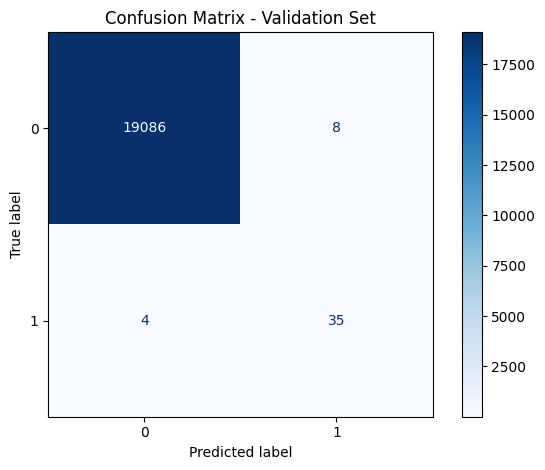

In [12]:
# Plot the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_val, y_val, cmap="Blues")
plt.title("Confusion Matrix - Validation Set")
plt.grid(False)
plt.tight_layout()
plt.show()

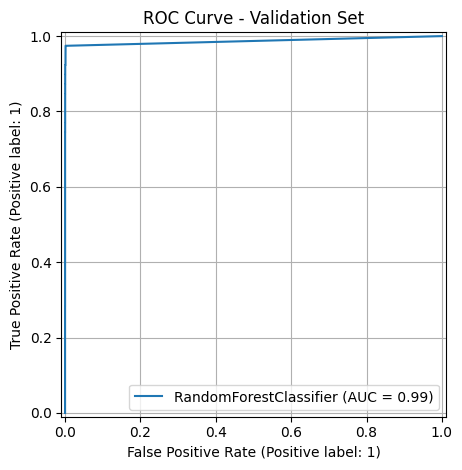

In [15]:
# Plot ROC curve
RocCurveDisplay.from_estimator(model, X_val, y_val)
plt.title("ROC Curve - Validation Set")
plt.grid(True)
plt.tight_layout()
plt.show()

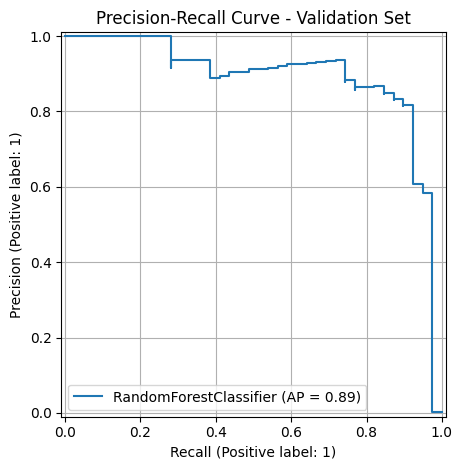

In [17]:
# Precision Recall Display
PrecisionRecallDisplay.from_estimator(model, X_val, y_val)
plt.title("Precision-Recall Curve - Validation Set")
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
#Evaluate on the test data
# Load preprocessed test data (without FraudResult)
X_test = pd.read_csv('../data/preprocessed_test.csv')
# Load original test data to get TransactionId
original_test = pd.read_csv('../data/test.csv')
transaction_ids = original_test['TransactionId']

In [8]:
# Make predictions
y_test_preds = model.predict(X_test)

In [10]:
# Save predictions with TransactionId
submission = pd.DataFrame({
    'TransactionId': transaction_ids,
    'FraudResult': y_test_preds.astype(int)  # ensure it's int (0 or 1)
})
submission.to_csv('../data/test_predictions.csv', index=False)

print("Predictions saved to test_predictions.csv")

Predictions saved to test_predictions.csv


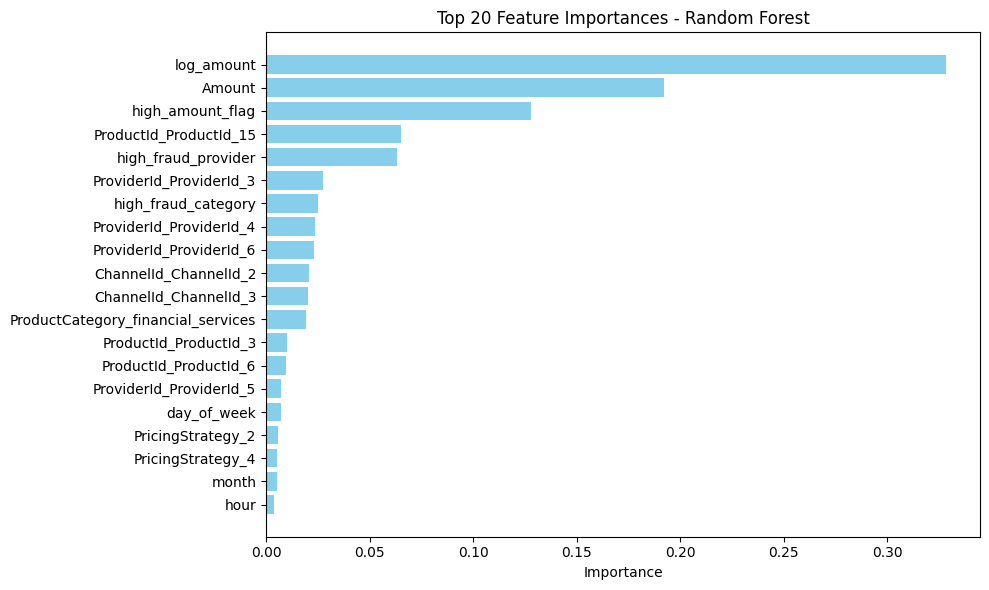

In [18]:

# Get feature importances from the trained model
importances = model.feature_importances_

# Create DataFrame with feature names and importances
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(20)  # top 20

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances - Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
